In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(context='notebook', style='darkgrid',palette='dark', font_scale=1.2)
%matplotlib inline

In [2]:
df=pd.read_csv("train.csv")
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.500,C52,S
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.475,C83,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.900,NaN,S
290,291,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.850,NaN,S
563,564,0,3,"Simmons, Mr. John",male,NaN,0,0,SOTON/OQ 392082,8.050,NaN,S


* PassengerID,Name,Ticket-No won't help much determining if one will Survive or not so we can skip these features

In [3]:
df.drop(["PassengerId","Ticket","Name"],axis=1,inplace=True)

In [4]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<Axes: xlabel='Age', ylabel='Density'>

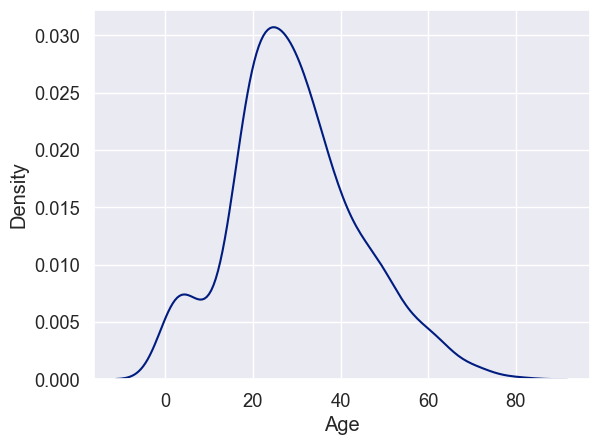

In [5]:
sns.kdeplot(df["Age"])

<Axes: xlabel='Age', ylabel='Density'>

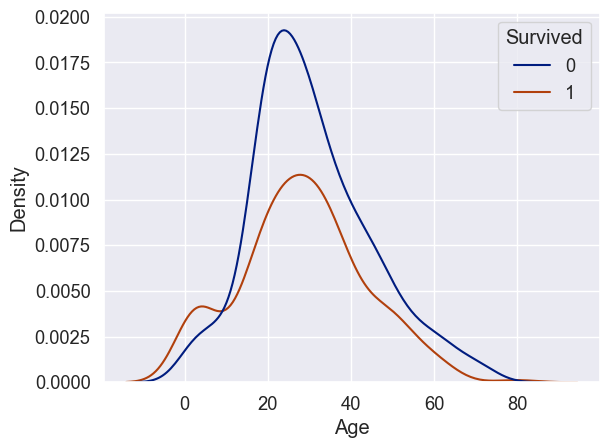

In [6]:
sns.kdeplot(x=df["Age"],hue=df["Survived"],palette="dark")

#

# Gender-Analysis

In [7]:
df.groupby("Sex")["Age"].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

<Axes: xlabel='Sex', ylabel='count'>

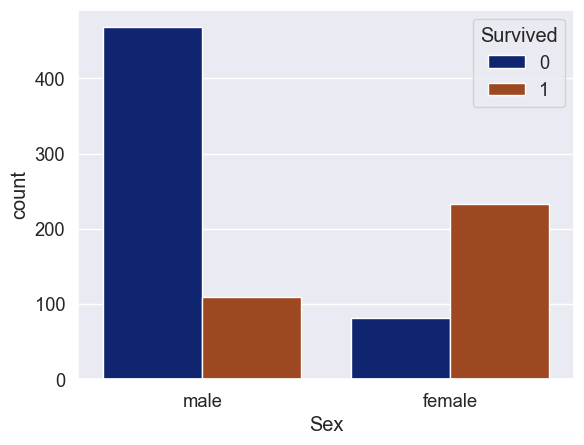

In [8]:
sns.countplot(x=df["Sex"],hue=df["Survived"])

<Axes: xlabel='Embarked', ylabel='count'>

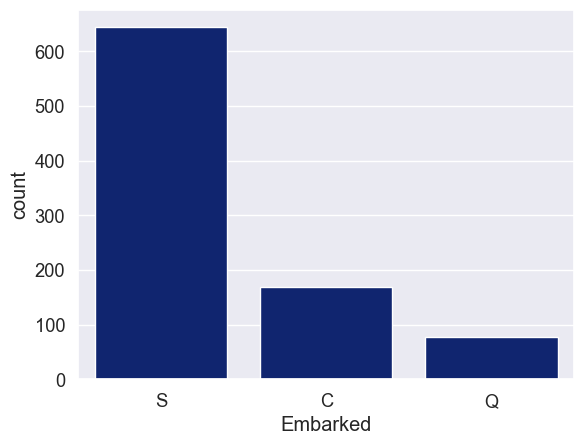

In [9]:
sns.countplot(x=df["Embarked"])

* We can use Median to fill Age col
* We can use most_frequent value for Embarked
* Teenagers and senior-age people are more like survive
* If You are female than chances of survival are slightly better

## Analysing Cabins Col

In [10]:
df["CabinClass"]= df["Cabin"].str.extract(r'([A-Za-z])')
df["CabinClass"].value_counts()
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,CabinClass
0,0,3,male,22.0,1,0,7.2500,NaN,S,NaN
1,1,1,female,38.0,1,0,71.2833,C85,C,C
2,1,3,female,26.0,0,0,7.9250,NaN,S,NaN
3,1,1,female,35.0,1,0,53.1000,C123,S,C
4,0,3,male,35.0,0,0,8.0500,NaN,S,NaN


In [11]:
cabins=df.groupby("CabinClass")

In [12]:
cabins["Fare"].describe()

,count,mean,std,min,25%,50%,75%,max
CabinClass,,,,,,,,
A,15.0,39.623887,17.975333,0.0000,30.8479,35.50000,50.24790,81.8583
B,47.0,113.505764,109.301500,0.0000,57.0000,80.00000,120.00000,512.3292
C,59.0,100.151341,70.225588,26.5500,42.5021,83.47500,143.59165,263.0000
D,33.0,57.244576,29.592832,12.8750,30.0000,53.10000,77.28750,113.2750
E,32.0,46.026694,32.608315,8.0500,26.1125,45.18125,56.15730,134.5000
F,13.0,18.696792,11.728217,7.6500,7.7500,13.00000,26.00000,39.0000
G,4.0,13.581250,3.601222,10.4625,10.4625,13.58125,16.70000,16.7000
T,1.0,35.500000,NaN,35.5000,35.5000,35.50000,35.50000,35.5000


In [13]:
cabins["Survived"].value_counts()

CabinClass  Survived
A           0            8
            1            7
B           1           35
            0           12
C           1           35
            0           24
D           1           25
            0            8
E           1           24
            0            8
F           1            8
            0            5
G           0            2
            1            2
T           0            1
Name: count, dtype: int64

* People Belonging C,D or E Class are priortize over other class 
* People of C,D or E cabin-class have tend spend more on fare
* But Since lot of Data is Missing it will be viable to drop this col

## Analyzing Families vs Singles

In [14]:
df["family"]=np.where(df["SibSp"]+df["Parch"]>0,1,0)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,CabinClass,family
0,0,3,male,22.0,1,0,7.2500,NaN,S,NaN,1
1,1,1,female,38.0,1,0,71.2833,C85,C,C,1
2,1,3,female,26.0,0,0,7.9250,NaN,S,NaN,0
3,1,1,female,35.0,1,0,53.1000,C123,S,C,1
4,0,3,male,35.0,0,0,8.0500,NaN,S,NaN,0


<Axes: >

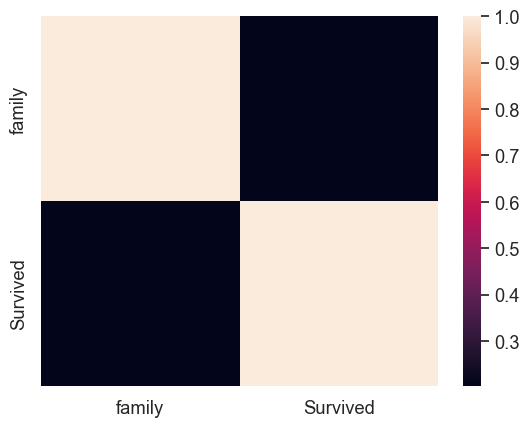

In [15]:
sns.heatmap(df[["family","Survived"]].corr())

* We can conclude that wether u travelling with or without family there is no much we can conclude about your Survival

<Axes: xlabel='Pclass', ylabel='count'>

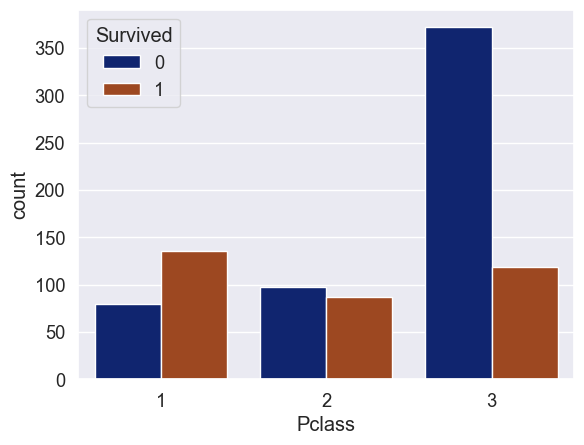

In [16]:
sns.countplot(x=df["Pclass"],hue=df["Survived"])

<Axes: xlabel='Embarked', ylabel='count'>

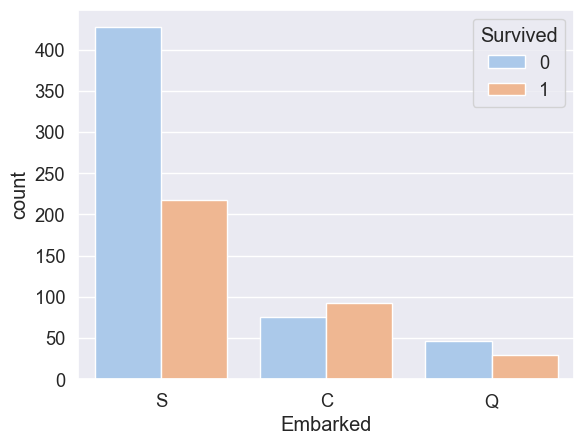

In [17]:
sns.countplot(x=df["Embarked"],hue=df["Survived"],palette="pastel")


* People Tende to be from Pclass-3 are more often to die
* People who Board from 'S' are likely to not survive

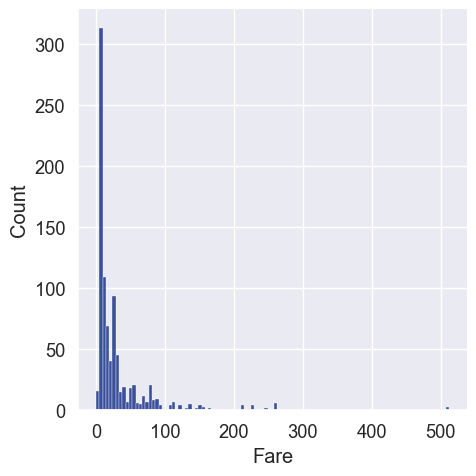

In [18]:
sns.displot(df["Fare"])